### Problem

A 2020 Turkish study<sup>1</sup> demonstrated that two distinct raisin varieties, Kecimen and Besni, could be accurately classified based on image-derived morphological features. These features included area, major axis length, minor axis length, eccentricity, convex area, and extent perimeter.

To simplify interpretation and enhance computational efficiency, it's worth exploring dimensionality reduction techniques for this dataset. By reducing the number of features while preserving essential information, we can potentially streamline the classification process and gain a clearer understanding of the key morphological characteristics that differentiate these raisin types."

Let's explore it!

#### References
1 - https://archive.ics.uci.edu/dataset/850/raisin

In [79]:
raisin_data = pd.read_csv('Raisin.csv')
raisin_data.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,Kecimen
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,Kecimen
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,Kecimen
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,Kecimen
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,Kecimen


In [80]:
raisin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [81]:
features = ["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea",	"Extent", "Perimeter"]	

In [82]:
raisin_data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


#### So, the dataset consists of seven continuous features without any missing values, along with a class label!!!

#### Let's see if there is a class imbalance

<Figure size 300x300 with 0 Axes>

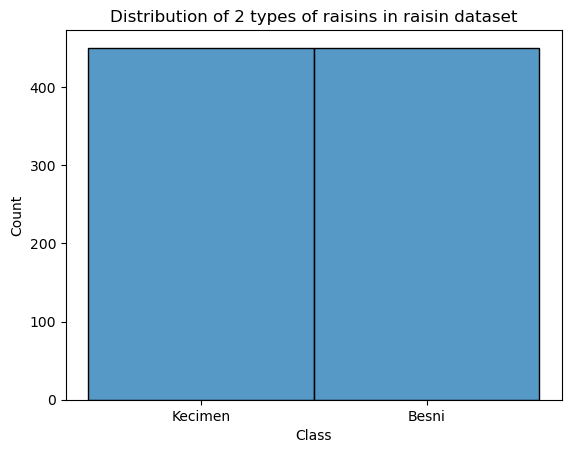

<Figure size 300x300 with 0 Axes>

In [83]:
# Visualise distibution of classes
sns.histplot(data=raisin_data, x='Class')
plt.title("Distribution of 2 types of raisins in raisin dataset")
plt.figure(figsize=(3,3))

#### Above graph shows that there are equal number of Kecimen and Besni type raisins in the dataset!

### Let's do some preprocessing for our dimensionality reduction !!!



In [84]:
labels = raisin_data['Class']
means = raisin_data[features].mean()
stds = raisin_data[features].std()
raisin_data_standardized = (raisin_data[features].sub(means)).div(stds)


#####  Lets check if our standardization is correct by checking if standard deviation is 1 and mean is 0 for all features


In [85]:
np.all(round(raisin_data_standardized.std(), 0) == 1), np.all(round(raisin_data_standardized.mean(), 0) == 0) 

(np.True_, np.True_)

##### Lets add the class labels to our standardized data set

In [86]:
raisin_data_standardized['Class'] = labels
raisin_data_standardized.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,-0.007182,0.097523,-0.023945,0.422906,-0.015700,1.106128,0.066237,Kecimen
1,-0.324037,-0.208896,-0.229165,0.224352,-0.304079,-0.287617,-0.161163,Kecimen
2,0.078249,0.097704,0.236856,0.186136,0.062079,-1.157606,0.155858,Kecimen
3,-1.073689,-1.244359,-0.914765,-1.069028,-1.075567,0.001711,-1.175261,Kecimen
4,-0.215274,-0.678581,0.726949,-2.408488,-0.238491,1.744289,-0.338450,Kecimen


### Let's start with PCA

In [87]:
# Transform the raisin data by pca 
pca = PCA(n_components=2) 
raisin_pca = pca.fit_transform(raisin_data_standardized[features]) #it is our pca transformed data!

In [88]:
# check the explained variance ration by our pca components
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.69032694, 0.20759835])

#### So, first pca component can explain the around 70% of variation, while the second component explains around 20%.
### In total the pca components can explain the 90% of variation in the whole data set !!!

### Visualize projection of data with PCA

Text(0, 0.5, 'Principal component 2 --explains ~20 variance')

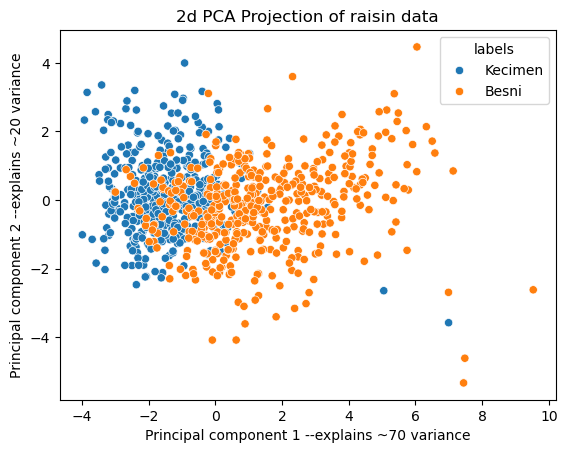

In [89]:
# visualize the raisin data set projected on the first 2 pricipal components
df_raisin_pca = pd.DataFrame(data=raisin_pca, columns=['pca1', 'pca2'])
df_raisin_pca['labels'] = labels

sns.scatterplot(data=df_raisin_pca, x='pca1', y='pca2', hue='labels')
plt.title("2d PCA Projection of raisin data")
plt.xlabel("Principal component 1 --explains ~70 variance")
plt.ylabel("Principal component 2 --explains ~20 variance")

### Lets look at the most important features for the two PCA components

In [90]:
pca.components_


array([[ 0.44828422,  0.4432398 ,  0.38938118,  0.20297098,  0.45093833,
        -0.05636836,  0.45082374],
       [ 0.11609991, -0.13658724,  0.37492246, -0.61082321,  0.08761633,
         0.66734439, -0.03417227]])

In [91]:
pca.feature_names_in_

array(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'], dtype=object)

In [92]:
df_pca_components = pd.DataFrame(pca.components_, columns= pca.feature_names_in_)
df_pca_components

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.448284,0.443240,0.389381,0.202971,0.450938,-0.056368,0.450824
1,0.116100,-0.136587,0.374922,-0.610823,0.087616,0.667344,-0.034172


In [93]:
# show the features from the most important to less for pca companent 1
df_pca_components.iloc[0].sort_values(key=abs)[::-1]

ConvexArea         0.450938
Perimeter          0.450824
Area               0.448284
MajorAxisLength    0.443240
MinorAxisLength    0.389381
Eccentricity       0.202971
Extent            -0.056368
Name: 0, dtype: float64

In [94]:
# show the features from the most important to less for pca companent 2
df_pca_components.iloc[1].sort_values(key=abs)[::-1]

Extent             0.667344
Eccentricity      -0.610823
MinorAxisLength    0.374922
MajorAxisLength   -0.136587
Area               0.116100
ConvexArea         0.087616
Perimeter         -0.034172
Name: 1, dtype: float64

### The most important features:
####   for pca1: Convex area and the perimeter
####   for pca2: Extent and the Eccentricity  

### Dimensionality Reduction with t-SNE

In [95]:
### Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, perplexity=30.0, random_state=1)
raisin_tsne = tsne.fit_transform(raisin_data_standardized[features])

### Visualize projection of data with t-SNE

Text(0, 0.5, 't-SNE component 2')

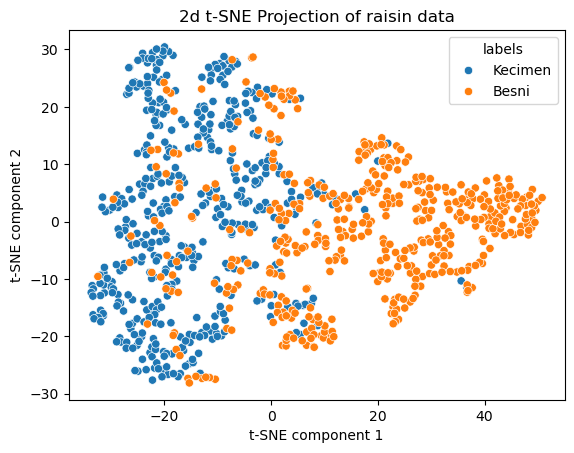

In [96]:
df_raisin_tsne = pd.DataFrame(data=raisin_tsne, columns=['tsne1', 'tsne2'])
df_raisin_tsne['labels'] = labels

sns.scatterplot(data=df_raisin_tsne, x='tsne1', y='tsne2', hue='labels')
plt.title("2d t-SNE Projection of raisin data")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")

#### t-SNE algorithm with default parameters doesn't perform well on sperating to raisin types. 
### Let's play with perplexity parameter and see if we get better results!

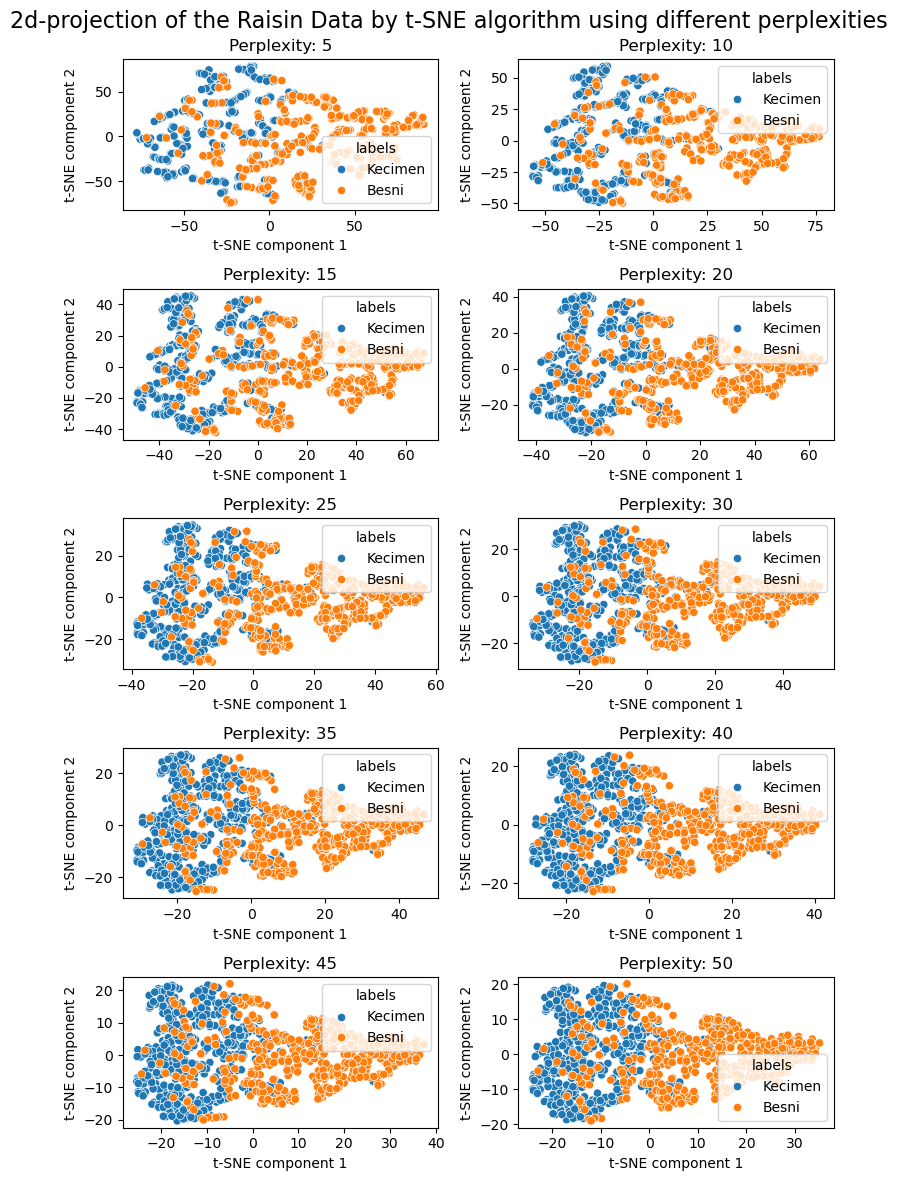

In [97]:
perplexities = np.arange(5,55, 5)

# adding multiple Axes objects  
fig, ax = plt.subplots(5, 2, tight_layout=True, figsize=(8,12))
fig.suptitle('2d-projection of the Raisin Data by t-SNE algorithm using different perplexities', fontsize=16)
plt.subplots_adjust(left=0.125, bottom=0.125, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

ax = ax.flatten()
for i,perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=1)
    raisin_tsne = tsne.fit_transform(raisin_data_standardized[features])
    df_raisin_tsne = pd.DataFrame(data=raisin_tsne, columns=['tsne1', 'tsne2'])
    df_raisin_tsne['labels'] = labels
    sns.scatterplot(data=df_raisin_tsne, x='tsne1', y='tsne2', hue='labels', ax=ax[i])
    ax[i].set_xlabel("t-SNE component 1")
    ax[i].set_ylabel("t-SNE component 2")
    ax[i].set_title(f'Perplexity: {perplexity}')

### Dimensionality Reduction with MDS

In [98]:
### Dimensionality Reduction with MDS
mds = MDS(n_components=2, random_state=1)
raisin_mds = mds.fit_transform(raisin_data_standardized[features])

### Visualize projection of data with MDS

Text(0, 0.5, 'mds component 2')

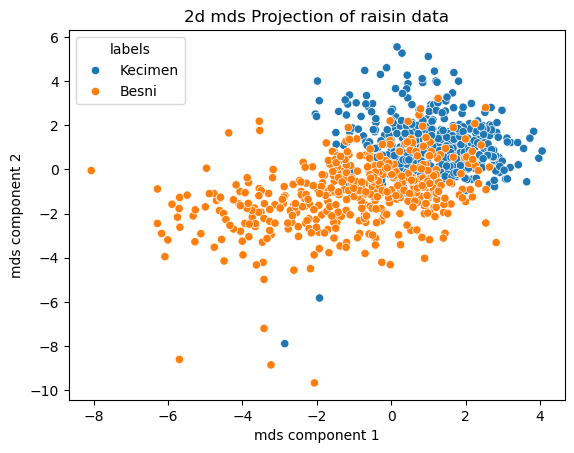

In [99]:
df_raisin_mds = pd.DataFrame(data=raisin_mds, columns=['mds1', 'mds2'])
df_raisin_mds['labels'] = labels

sns.scatterplot(data=df_raisin_mds, x='mds1', y='mds2', hue='labels')
plt.title("2d mds Projection of raisin data")
plt.xlabel("mds component 1")
plt.ylabel("mds component 2")

### Dimensionality Reduction with UMAP

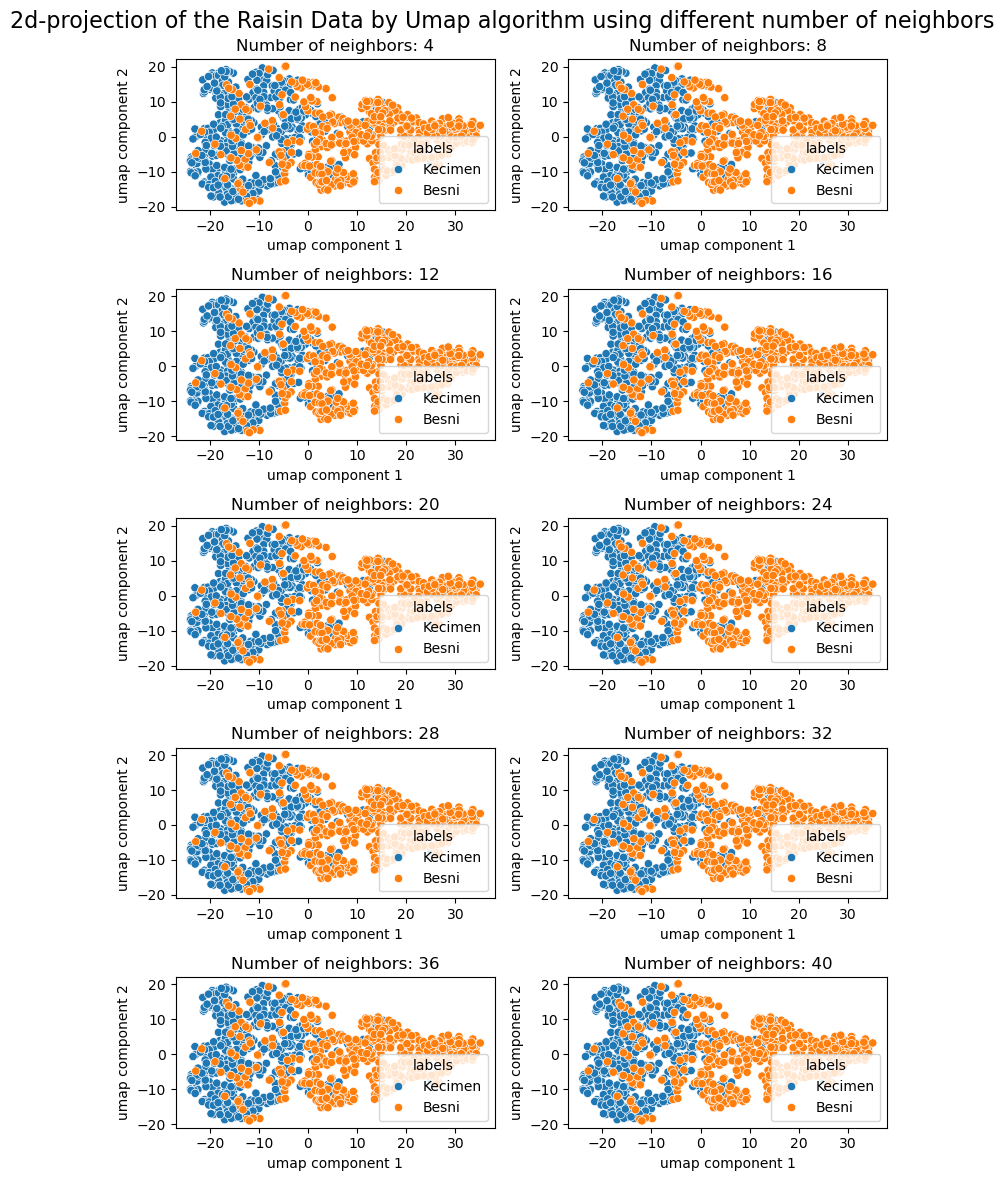

In [100]:
n_neighbors = np.arange(4,42, 4)

# adding multiple Axes objects  
fig, ax = plt.subplots(5, 2, tight_layout=True, figsize=(8,12))
fig.suptitle('2d-projection of the Raisin Data by Umap algorithm using different number of neighbors', fontsize=16)
plt.subplots_adjust(left=0.125, bottom=0.125, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

ax = ax.flatten()
for i, neighbor in enumerate(n_neighbors):
    umap_ = umap.UMAP(n_components=2, n_neighbors=neighbor)
    raisin_umap = umap_.fit_transform(raisin_data_standardized[features])
    df_raisin_umap = pd.DataFrame(data=raisin_tsne, columns=['umap1', 'umap2'])
    df_raisin_umap['labels'] = labels
    sns.scatterplot(data=df_raisin_umap, x='umap1', y='umap2', hue='labels', ax=ax[i])
    ax[i].set_xlabel("umap component 1")
    ax[i].set_ylabel("umap component 2")
    ax[i].set_title(f'Number of neighbors: {neighbor}')

For the raisin dataset, I explored several dimensionality reduction techniques: PCA, t-SNE, MDS, and UMAP. I visualized data on the projected dimensions created by these methods. While all techniques were effective in reducing dimensionality, the resulting visualizations were surprisingly similar.

However, I slightly favor PCA due to its interpretability. The components of PCA offer a more concrete understanding of the underlying data structure.